# Simulated annealing - Caixeiro Viajante
## Luís Felipe Ramos Ferreira - 2019022553

In [196]:
import numpy as np
import numpy.typing as npt
import scipy
import matplotlib.pyplot as plt

In [197]:
def generate_random_graph(number_of_nodes: np.int_) -> npt.NDArray[np.float_]:
    nodes: npt.NDArray[np.float_] = np.random.rand(number_of_nodes, 2)
    adjacency_matrix: npt.NDArray[np.float_] = scipy.spatial.distance_matrix(nodes, nodes)
    return adjacency_matrix, nodes

def plot_path(nodes: npt.NDArray[np.float_], path: npt.NDArray[np.int_]) -> None:
    plt.scatter(nodes[:, 0], nodes[:,1], c="black")
    for i in range(path.shape[0] - 1):
        x_coordinates: npt.NDArray[np.float_] = np.array([nodes[path[i]][0], nodes[path[i + 1]][0]])
        y_coordinates: npt.NDArray[np.float_] = np.array([nodes[path[i]][1], nodes[path[i + 1]][1]])
        plt.plot(x_coordinates, y_coordinates, "r-")

/tmp/ipykernel_233134/839693082.py:31: RuntimeWarning: overflow encountered in exp
  P: np.float_ = np.exp(-1 * delta / temperature)


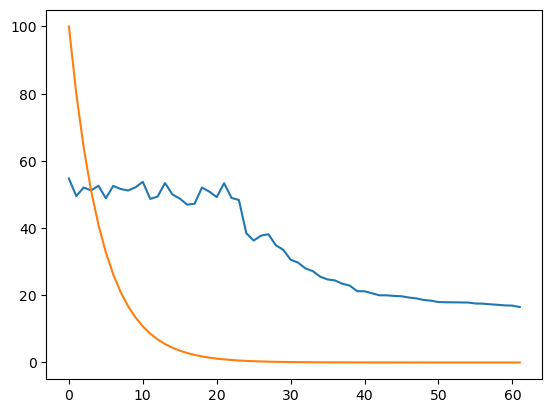

In [235]:
def tsp(number_of_cities: np.int_) -> npt.NDArray[np.int_]:
    temperature: np.float_ = 100.0
    delta_t: np.float_ = 0.8
    temperature_inferior_limit: np.float_ = 0.0001
    graph, nodes = generate_random_graph(number_of_nodes=number_of_cities)
    current_path: npt.NDArray[np.int_] = np.arange(number_of_cities)
    np.random.shuffle(current_path)
    edges: npt.NDArray[np.int_] = np.append(np.lib.stride_tricks.sliding_window_view(current_path, 2), [[current_path[-1], current_path[0]]], axis=0)
    current_path_cost: np.float_ = np.sum([graph[i, j] for i, j in edges])
    
    temp = []
    ener = []

    while temperature > temperature_inferior_limit:
        temp.append(temperature)
        ener.append(current_path_cost)
        for _ in range(100):
            proposed_x, proposed_y = np.random.choice(np.arange(number_of_cities), size=2, replace=False)
            proposed_path: npt.NDArray[np.int_] = current_path.copy()
            proposed_path[[proposed_x, proposed_y]] = proposed_path[[proposed_y, proposed_x]]
            

            current_path = np.append(current_path, current_path[0])
            proposed_path = np.append(proposed_path, proposed_path[0])

            decrease: np.float_ = graph[current_path[proposed_x - 1], current_path[proposed_x]] + graph[current_path[proposed_x], current_path[proposed_x + 1]] + graph[current_path[proposed_y - 1], current_path[proposed_y]] + graph[current_path[proposed_y], current_path[proposed_y + 1]]
            increase: np.float_ = graph[proposed_path[proposed_x - 1], proposed_path[proposed_x]] + graph[proposed_path[proposed_x], proposed_path[proposed_x + 1]] + graph[proposed_path[proposed_y - 1], proposed_path[proposed_y]] + graph[proposed_path[proposed_y], proposed_path[proposed_y + 1]]
            proposed_path_cost: np.float_ = current_path_cost - decrease + increase
            delta: np.float_ = proposed_path_cost - current_path_cost
            r: np.float_ = np.random.rand()
            P: np.float_ = np.exp(-1 * delta / temperature)
            if r <= P:
                current_path = proposed_path
                current_path_cost = proposed_path_cost
            current_path = current_path[:-1]
        temperature *= delta_t

    plt.plot(ener)    
    plt.plot(temp)    

    current_path = np.append(current_path, current_path[0])
    return nodes, current_path

a, b = tsp(100)

In [199]:
a = np.arange(5)
a = a[:-1]
a

array([0, 1, 2, 3])